2.1 TASK 1

Load the sudoku-original image in grayscale mode.

(423, 419)


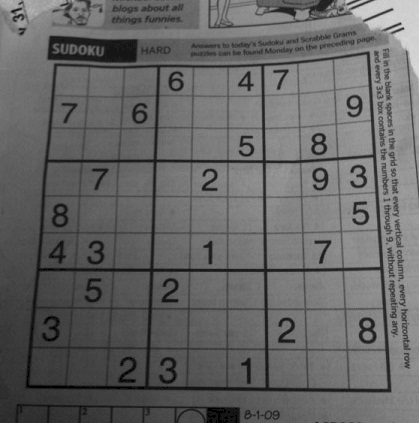

In [2]:
import cv2
from google.colab.patches import cv2_imshow
# 0 means grayscale mode
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sudoku-original.png',0)
print(img.shape)
cv2_imshow(img)

2.1 TASK 2

Plot the histogram of intensities of the image.

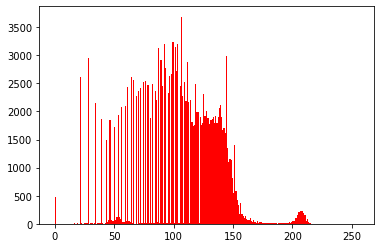

In [3]:
import matplotlib.pyplot as plt
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

2.1 TASK 3

Choose 4 points and perform a Perspective Transformation to obtain the sudoku as a proper square.

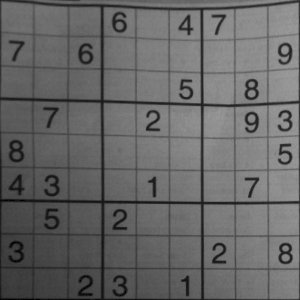

In [4]:
import numpy as np
rows,cols = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

cv2_imshow(dst)

2.2 TASK 1

Load the energydata complete.csv file.

In [5]:
#2.2
import pandas as pd
import matplotlib.pyplot as plt
import datetime
timedata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energydata_complete.csv')

The first line of code is converting the date in the csv to datetime from a string.
The second line of code is filtering out one week of data.

In [6]:
timedata['date'] = pd.to_datetime(timedata['date'])
filt = ((timedata['date'] >= '2016-01-17') & (timedata['date'] < '2016-01-24'))

Below is the plot of the Appliances for the whole period for task 1.

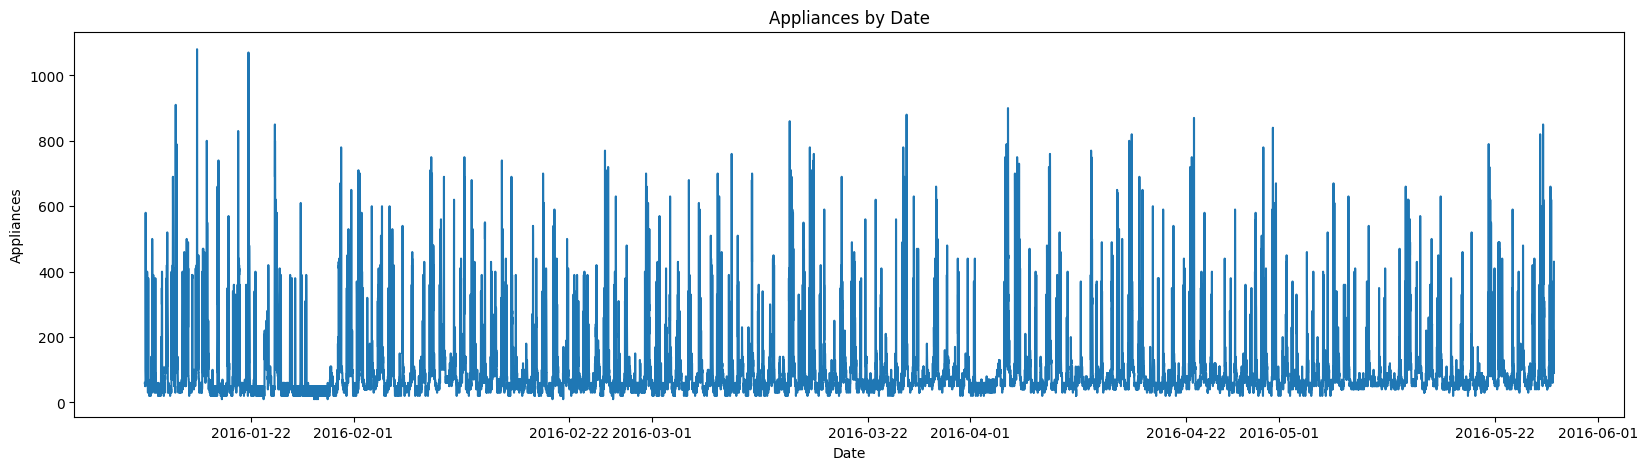

In [7]:
#2.2 task 1
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_x = timedata['date']
dev_y = timedata['Appliances']
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Appliances by Date')
plt.plot(dev_x,dev_y)
plt.tight_layout
plt.show()

Below is the plot of the Energy Consumption for the whole period for task 1.

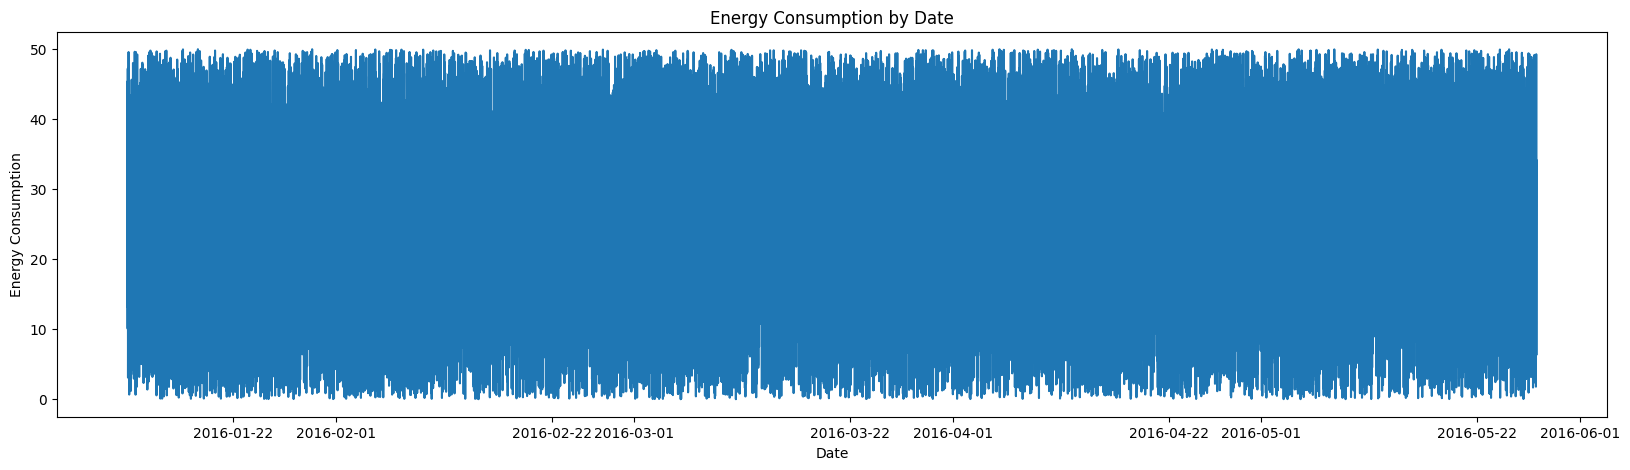

In [8]:
#2.2 task 1
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_x = timedata['date']
dev_y = timedata['Energy Consumption']
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Date')
plt.plot(dev_x,dev_y)
plt.tight_layout
plt.show()

Below is the plot of the Appliances for one week for task 1.

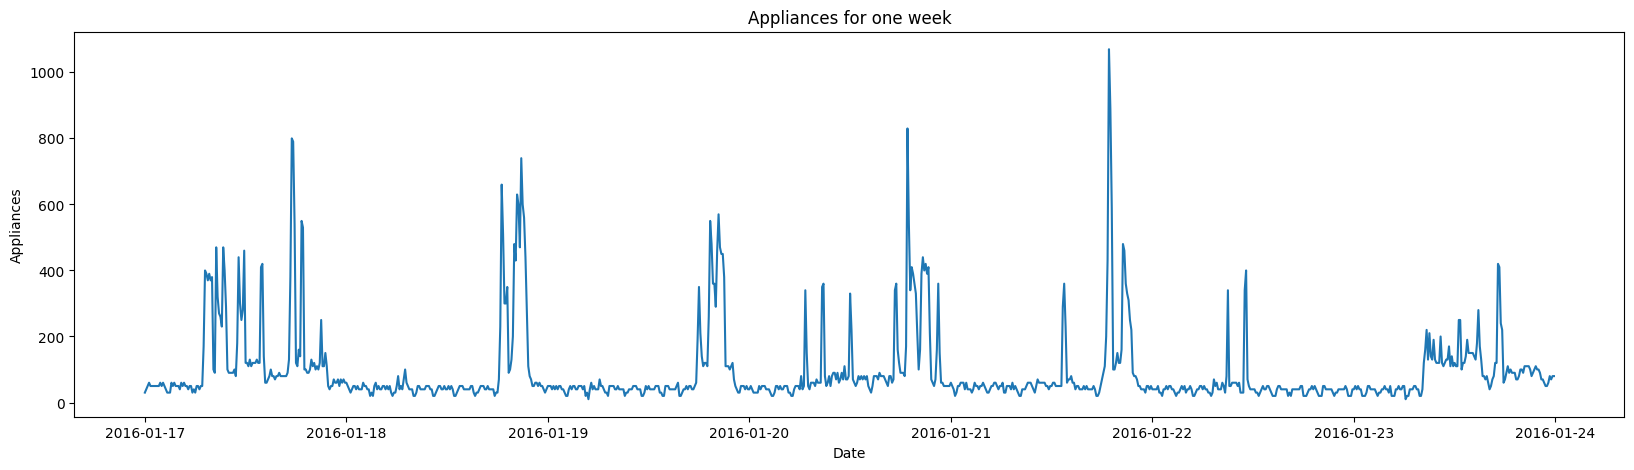

In [9]:
#2.2 task 1
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_x = timedata.loc[filt,'date']
dev_y = timedata.loc[filt,'Appliances']
left = datetime.date(2016, 1, 17)
right = datetime.date(2016, 1, 23)
plt.gca().set_xbound(left,right)
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Appliances for one week')
plt.plot(dev_x,dev_y)
plt.tight_layout
plt.show()

Below is the plot of the Energy Consumption for one week for task 1.

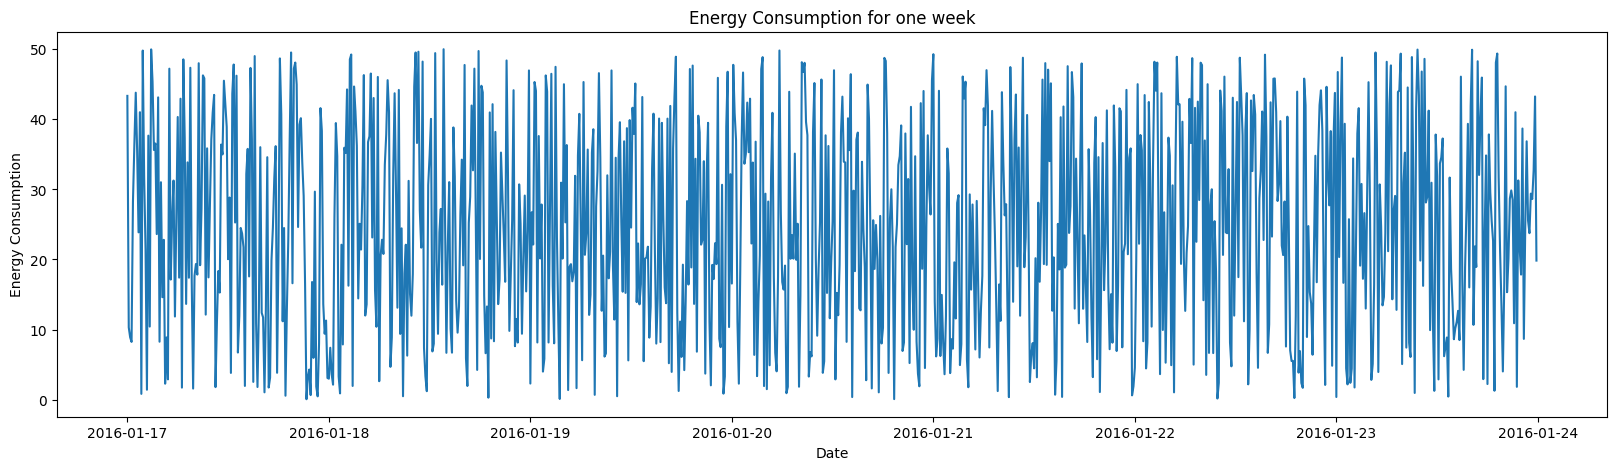

In [10]:
#2.2 task 1
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_x = timedata.loc[filt,'date']
dev_y = timedata.loc[filt,'Energy Consumption']
left = datetime.date(2016, 1, 17)
right = datetime.date(2016, 1, 23)
plt.gca().set_xbound(left,right)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for one week')
plt.plot(dev_x,dev_y)
plt.tight_layout
plt.show()

2.2 TASK 2

I am taking the one week data that we filtered previously and store the Appliances for every hour because the data recorded is every 10 minutes. The for loop is used to combine the data of 60 mins of appliances for a week. 

In [11]:
d = []
myList = timedata.loc[filt,'Appliances']
data = []
for line in myList:
  data.append(line);
num = 0;
x = 0;
for i in range(0,len(myList)):
  num = num + data[i];
  x += 1;
  if(x == 6):
    d.append(num);
    x = 0;
    num = 0;

created a 2-D array with 7 columns and 24 rows for the heatmap, having all of them 0. Iterate through the 2-D array and store the information above to its appropriate time slots.

In [12]:
import numpy as np
hm = np.zeros([24,7],dtype = float)

x = 0
for i in range(7):
  for j in range(24):
    hm[j][i] = d[x]
    x += 1

Below is plotting the heatmap, and labelling the x-axis and y-axis for task 2.

<Figure size 2000x500 with 0 Axes>

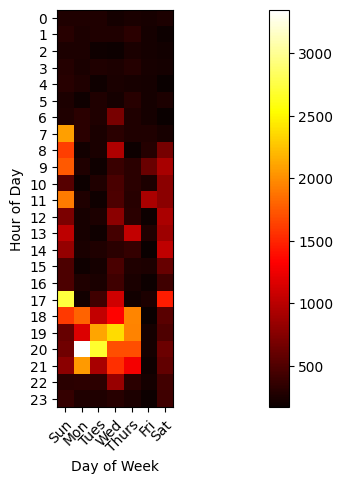

In [13]:
#2.2 task 2
plt.figure(figsize = (20,5))
fig, ax = plt.subplots()

labels = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']
ax.set_xticks(range(7)) 
ax.set_xticklabels(labels)

ax.set_yticks(range(24))
ax.set_yticklabels(range(24))
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
#im = ax.imshow(hm)
fig.tight_layout()

plt.imshow(hm, cmap = 'hot')
plt.colorbar()
plt.show()

2.2 TASK 3

Below is plotting the histogram of the Appliances consumption for task 3.

Text(0, 0.5, 'Probability')

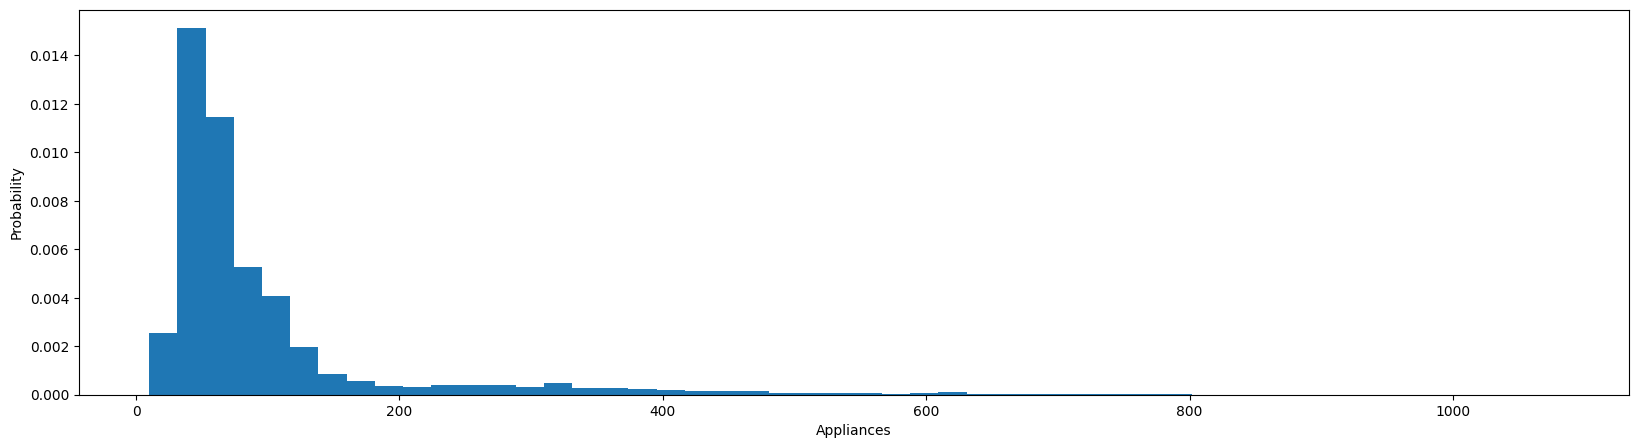

In [14]:
#2.2 task 3
plt.hist(timedata['Appliances'], density = True, bins = 50)
plt.xlabel('Appliances')
plt.ylabel('Probability')

Below is plotting the histogram of the Energy Consumption for task 3.

Text(0, 0.5, 'Probability')

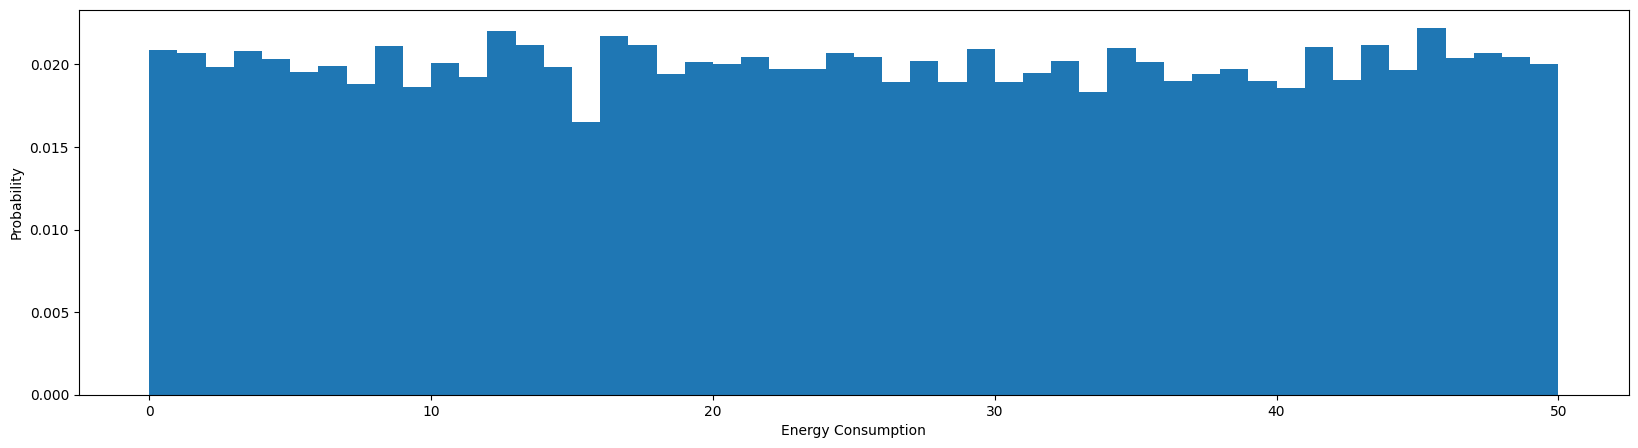

In [15]:
plt.hist(timedata['Energy Consumption'], density = True, bins = 50)
plt.xlabel('Energy Consumption')
plt.ylabel('Probability')

2.2 TASK 4

Below is creating the feature variable NSM(no. of seconds from midnight)  and storing them in an array NSM. The data used in the plot is filtered to one week and the NSM variable is used to plot Energy Consumption vs NSM for task 4.

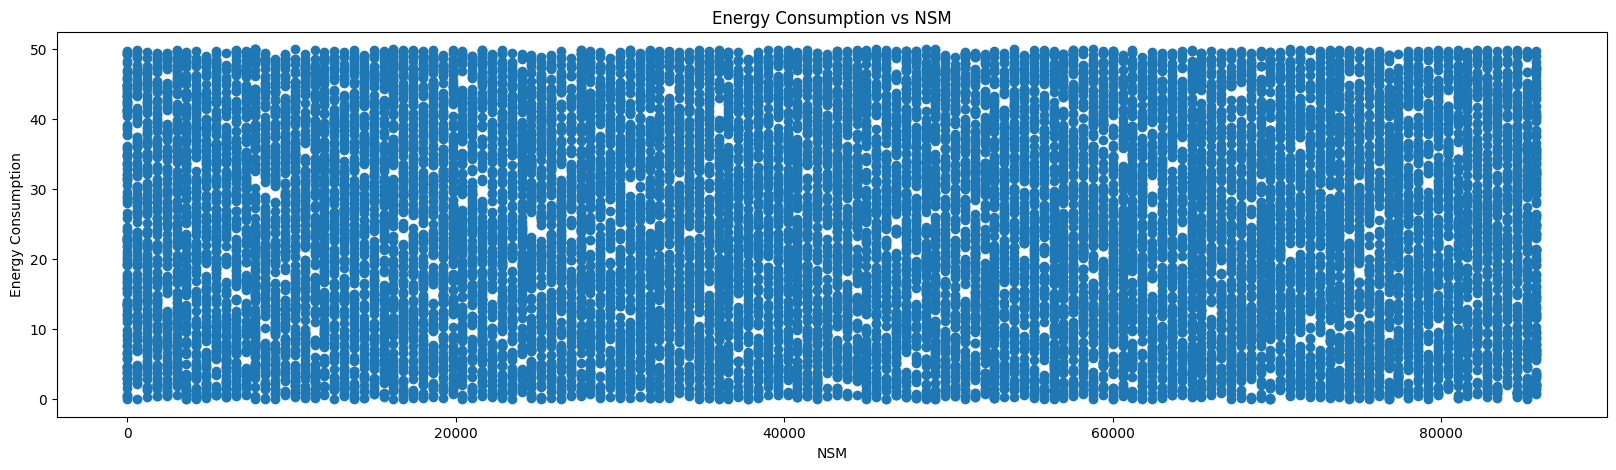

In [20]:
#de = ((timedata['date'] >= '2016-01-17') & (timedata['date'] < '2016-01-24'))
#(timedata['date'] >= '2016-01-18') & (timedata['date'] < '2016-01-19')
#timedata[de]
dinsec = []
mySec = timedata['date']
for ln in mySec:
  dinsec.append(ln);
#myEG = timedata.loc[de,'Energy Consumption']
myEG = timedata['Energy Consumption']
eg = []
for ln in myEG:
  eg.append(ln);
NSM = []

for i in range(len(dinsec)):
  delta_time = dinsec[i] - dinsec[i].replace(hour = 0, minute = 0, second = 0, microsecond = 0)
  sec = delta_time.total_seconds()
  NSM.append(sec)
plt.xlabel('NSM')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs NSM')
plt.scatter(NSM,eg)

Below is the plot for Appliances vs NSM

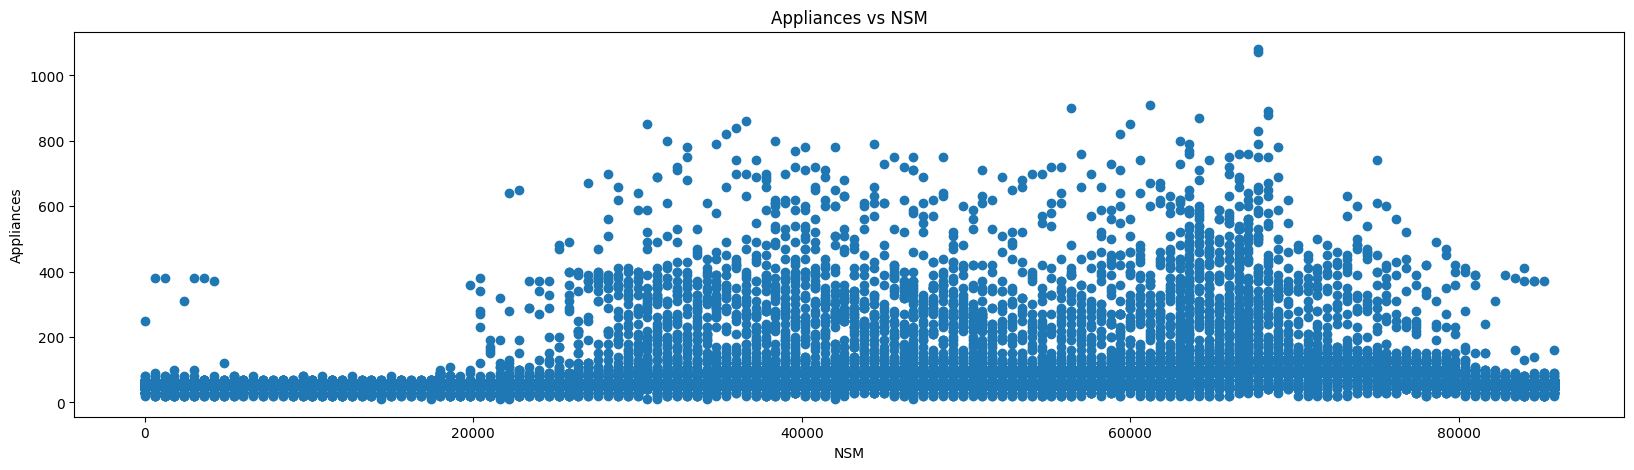

In [21]:
dinsec = []
mySec = timedata['date']
for ln in mySec:
  dinsec.append(ln);
#myEG = timedata.loc[de,'Energy Consumption']
myEG = timedata['Appliances']
eg = []
for ln in myEG:
  eg.append(ln);
NSM = []

for i in range(len(dinsec)):
  delta_time = dinsec[i] - dinsec[i].replace(hour = 0, minute = 0, second = 0, microsecond = 0)
  sec = delta_time.total_seconds()
  NSM.append(sec)
plt.xlabel('NSM')
plt.ylabel('Appliances')
plt.title('Appliances vs NSM')
plt.scatter(NSM,eg)

2.2 TASK 5

Below is the plot for Energy Consumption vs Press_mm_hg for task 5.

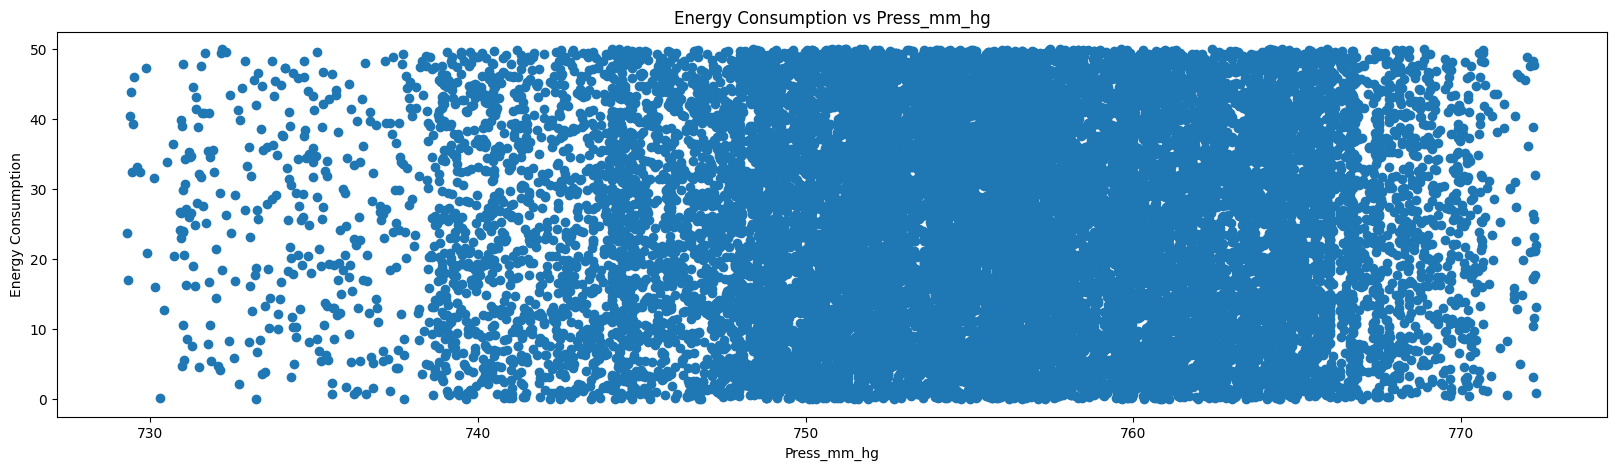

In [18]:
#2.2 task 5
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_y = timedata['Energy Consumption']
dev_x = timedata['Press_mm_hg']
plt.xlabel('Press_mm_hg')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs Press_mm_hg')
plt.scatter(dev_x,dev_y)
plt.tight_layout
plt.show()

Below is the plot for Energy Consumption vs Press_mm_hg for one week.

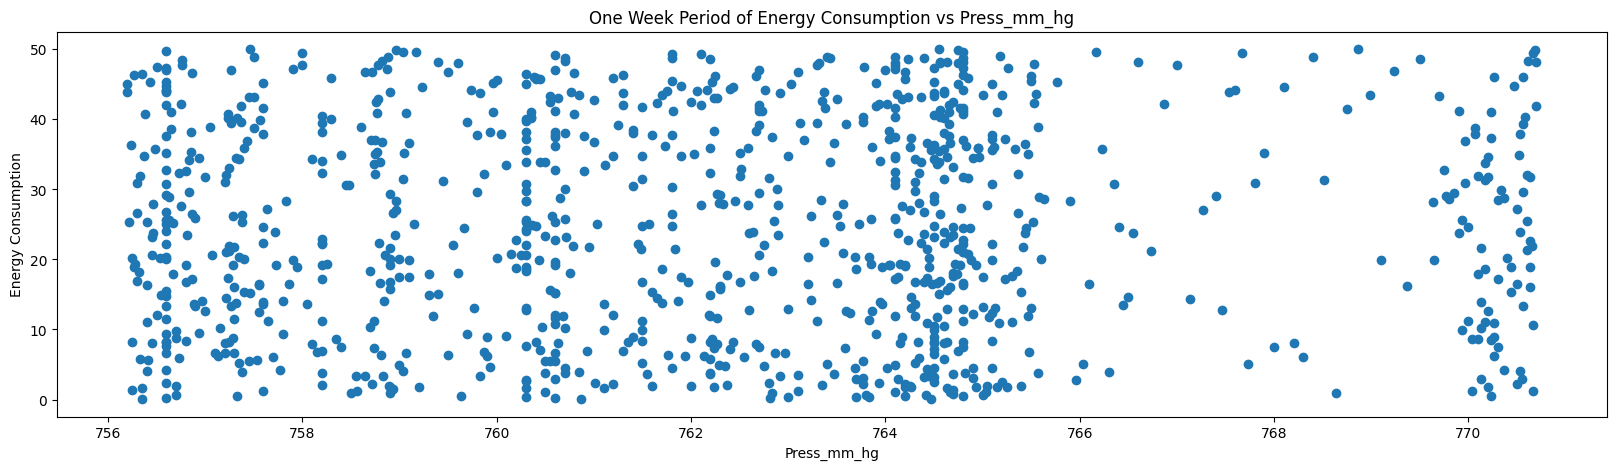

In [25]:
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_y = timedata.loc[filt,'Energy Consumption']
dev_x = timedata.loc[filt,'Press_mm_hg']
plt.xlabel('Press_mm_hg')
plt.ylabel('Energy Consumption')
plt.title('One Week Period of Energy Consumption vs Press_mm_hg')
plt.scatter(dev_x,dev_y)
plt.tight_layout
plt.show()

Below is the plot for Appliances vs Press_mm_hg.

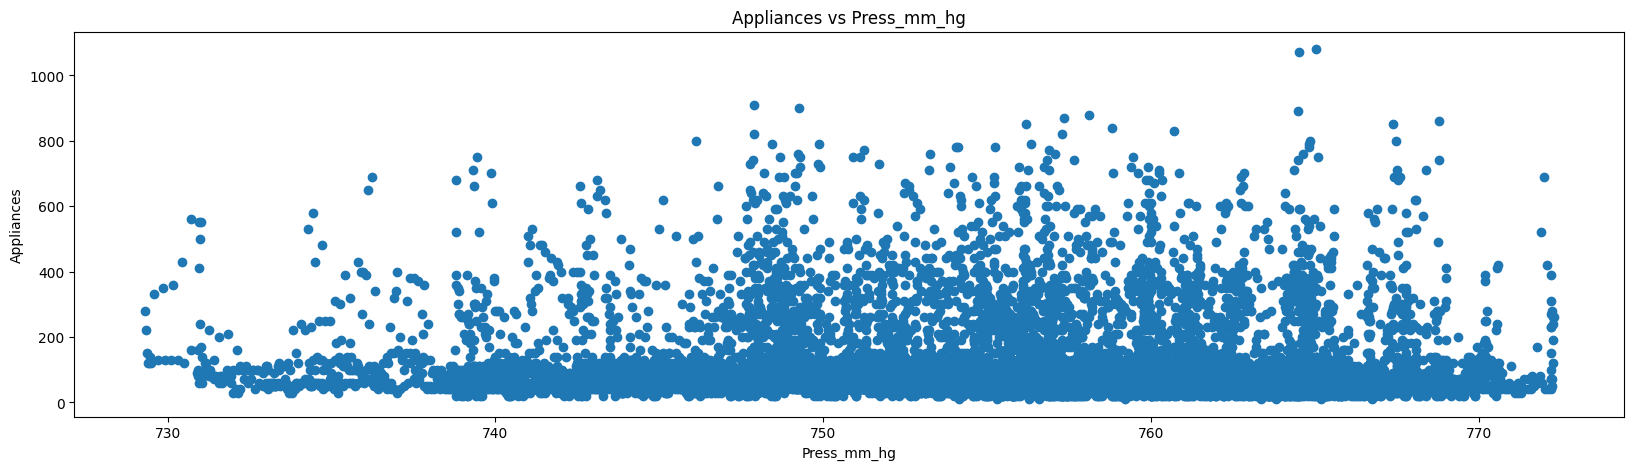

In [19]:
plt.figure
plt.style.use('default')
plt.rcParams["figure.figsize"] = (20,5)
dev_y = timedata['Appliances']
dev_x = timedata['Press_mm_hg']
plt.xlabel('Press_mm_hg')
plt.ylabel('Appliances')
plt.title('Appliances vs Press_mm_hg')
plt.scatter(dev_x,dev_y)
plt.tight_layout
plt.show()

2.2 TASK 6

There is some corelation between the Press_mm_Hg to Energy Consumption. As shown in the above graph, there is a cluster occuring when Press_mm_Hg is in the range between 750 to 760. There is a limit where once Press_mm_Hg reach 766, the energy consumption reduces significantly in the one week chart. There is a normal distribution between the Energy Consumption and Press_mm_hg. Besdies, there is also a cluster occuring when the NSM is in the range of 60,000s to 70,000s. The amount of energy after 70,000s and before 60,000s decreases significantly.

2.3 TASK

Below code is reading the .dat file and seperating them by tab and giving it a header for each column.

In [22]:
#2.3 task
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airfoil_self_noise.dat',sep='\t',names =['Frequency(Hz)','Angle of attack(degrees)','Chord Length(meters)','Free-stream velocity(m/s)','Suction side displacement thickness(meters)','Scaled sount pressure level(decibels)'])


Below is using a for loop to iterate through the data and finding the mean, standard deviation, median, kurtosis, skewnss and range for each column of data. The results are formatted to 3 decimals for all of them.




In [23]:
import statistics
from scipy.stats import kurtosis
from scipy.stats import skew

for data in df.keys():
  print(f"The mean of {data} is {df[data].mean():.3f}.")
  std = statistics.stdev(df[data])
  print(f"The standard deviation of {data} is {std:.3f}.")
  print(f"The median of {data} is {df[data].median():.3f}.")
  kurt = kurtosis(df[data])
  print(f"The kurtosis of {data} is {kurt:.3f}.")
  sk = skew(df[data])
  print(f"The skewness of {data} is {sk:.3f}.")
  print(f"The range of {data} is {df[data].min():.3f} to {df[data].max():.3f}.")
  print("\n")

The mean of Frequency(Hz) is 2886.381.
The standard deviation of Frequency(Hz) is 3152.573.
The median of Frequency(Hz) is 1600.000.
The kurtosis of Frequency(Hz) is 5.686.
The skewness of Frequency(Hz) is 2.135.
The range of Frequency(Hz) is 200.000 to 20000.000.


The mean of Angle of attack(degrees) is 6.782.
The standard deviation of Angle of attack(degrees) is 5.918.
The median of Angle of attack(degrees) is 5.400.
The kurtosis of Angle of attack(degrees) is -0.416.
The skewness of Angle of attack(degrees) is 0.688.
The range of Angle of attack(degrees) is 0.000 to 22.200.


The mean of Chord Length(meters) is 0.137.
The standard deviation of Chord Length(meters) is 0.094.
The median of Chord Length(meters) is 0.102.
The kurtosis of Chord Length(meters) is -1.039.
The skewness of Chord Length(meters) is 0.457.
The range of Chord Length(meters) is 0.025 to 0.305.


The mean of Free-stream velocity(m/s) is 50.861.
The standard deviation of Free-stream velocity(m/s) is 15.573.
The me